<strong>데이터 시각화</strong>를 위한 <strong>라이브러리 import</strong> 후<br><strong>한글 깨짐 처리</strong>

In [ ]:
# 데이터 시각화를 위한 라이브러리 import
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 한글 깨짐 방지
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

# save_image()를 위한 plotly 설치
!pip install plotly==4.4.1
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

전주시 기온 데이터 불러오기

In [ ]:
# 데이터 불러오기
df_jeonju = pd.read_csv('/content/jeonju_temperature_1930_2020.csv', encoding='cp949')

**전주시** 기온 데이터 분류 및 시각화 준비

In [ ]:
# 날짜와 기온을 담을 리스트 준비하기
# 1. 1930년 ~ 1942년 리스트
year30_42 = [year for year in range(1930, 1943)]
jj_30_42 = []
jj_30_42_temp = []

# 2. 1943년 ~ 1955년 리스트
year43_55 = [year for year in range(1943, 1956)]
jj_43_55 = []
jj_43_55_temp = []

# 3. 1956년 ~ 1968년 리스트
year56_68 = [year for year in range(1956, 1969)]
jj_56_68 = []
jj_56_68_temp = []

# 4. 1969년 ~ 1981년 리스트
year69_81 = [year for year in range(1969, 1982)]
jj_69_81 = []
jj_69_81_temp = []

# 5. 1982년 ~ 1994년 리스트
year82_94 = [year for year in range(1982, 1995)]
jj_82_94 = []
jj_82_94_temp = []

# 6. 1995년 ~ 2007년 리스트
year95_07 = [year for year in range(1995, 2008)]
jj_95_07 = []
jj_95_07_temp = []

# 7. 2008년 ~ 2020년 리스트
year08_20 = [year for year in range(2008, 2021)]
jj_08_20 = []
jj_08_20_temp = []

In [ ]:
# 전주시 기온 데이터 시각화를 위한 데이터 리스트에 담기
for i in df_jeonju.index :
  for j in range(13) :
    if year30_42[j] == df_jeonju.loc[i, '일시'] :
      jj_30_42.append(df_jeonju.loc[i, '일시'])
      jj_30_42_temp.append(df_jeonju.loc[i, '평균기온(℃)'])

    elif year43_55[j] == df_jeonju.loc[i, '일시'] :
      jj_43_55.append(df_jeonju.loc[i, '일시'])
      jj_43_55_temp.append(df_jeonju.loc[i, '평균기온(℃)'])

    elif year56_68[j] == df_jeonju.loc[i, '일시'] :
      jj_56_68.append(df_jeonju.loc[i, '일시'])
      jj_56_68_temp.append(df_jeonju.loc[i, '평균기온(℃)'])

    elif year69_81[j] == df_jeonju.loc[i, '일시'] :
      jj_69_81.append(df_jeonju.loc[i, '일시'])
      jj_69_81_temp.append(df_jeonju.loc[i, '평균기온(℃)'])

    elif year82_94[j] == df_jeonju.loc[i, '일시'] :
      jj_82_94.append(df_jeonju.loc[i, '일시'])
      jj_82_94_temp.append(df_jeonju.loc[i, '평균기온(℃)'])
      
    elif year95_07[j] == df_jeonju.loc[i, '일시'] :
      jj_95_07.append(df_jeonju.loc[i, '일시'])
      jj_95_07_temp.append(df_jeonju.loc[i, '평균기온(℃)'])

    elif year08_20[j] == df_jeonju.loc[i, '일시'] :
      jj_08_20.append(df_jeonju.loc[i, '일시'])
      jj_08_20_temp.append(df_jeonju.loc[i, '평균기온(℃)'])

In [ ]:
print(jj_08_20)
print(jj_08_20_temp)

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
[13.9, 13.6, 13.5, 13.1, 13.2, 13.8, 13.9, 14.2, 14.3, 13.6, 13.9, 14.2, 14.0]


In [ ]:
print(df_jeonju[df_jeonju['일시'] == 1998])
df_jeonju[df_jeonju['일시'] == 2011]

      일시  평균기온(℃)  평균최고기온(℃)  ...  평균최저기온(℃) 최저기온(℃)      최저기온일자
68  1998     14.6       19.6  ...       10.3   -12.2  1998-01-25

[1 rows x 8 columns]


,일시,평균기온(℃),평균최고기온(℃),최고기온(℃),최고기온일자,평균최저기온(℃),최저기온(℃),최저기온일자
81,2011,13.1,18.7,36.2,2011-08-05,8.4,-13.4,2011-01-16


**전주시** 1930년 부터 2020년까지 13개년도로 묶어서 7 묶음을 시각화하기

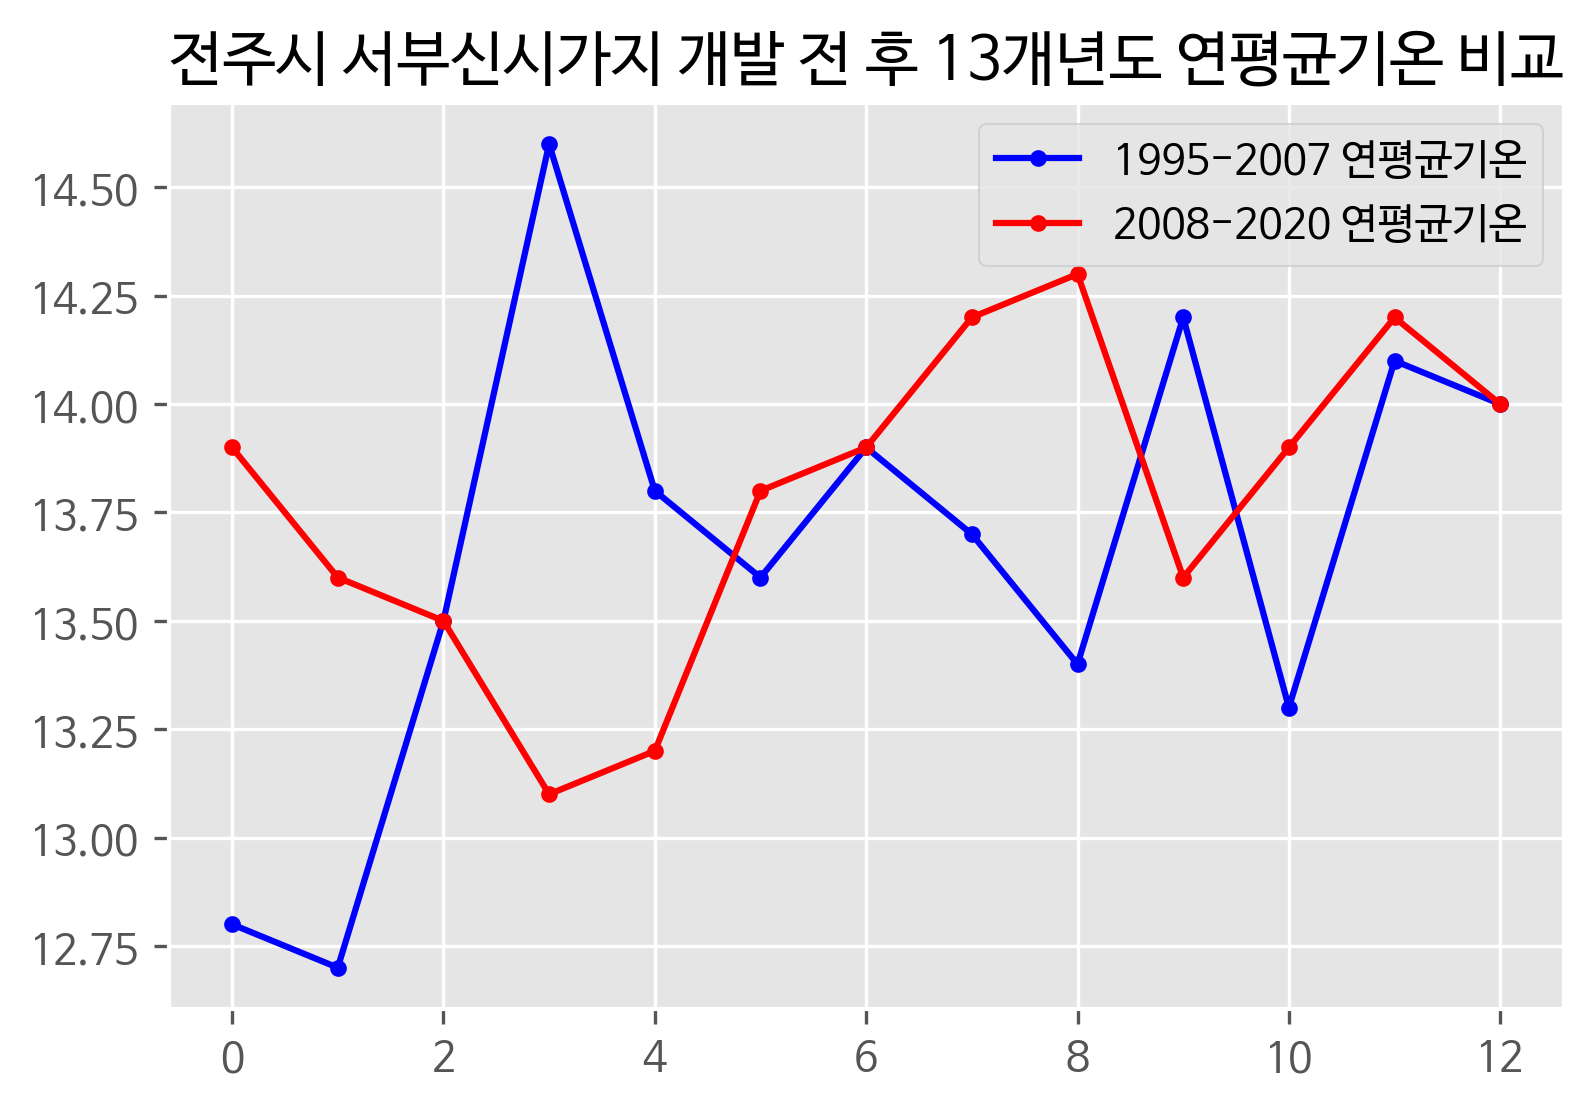

In [ ]:
# 데이터 시각화
# 차트 설정
plt.figure(dpi=150)
plt.style.use('ggplot') # 스타일 지정
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정 -> 한글 깨짐 처리
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 차트 그리기
# plt.plot(jj_30_42_temp, marker='.', label='1930-1942 연평균기온')
# plt.plot(jj_43_55_temp, marker='.', label='1943-1955 연평균기온')
# plt.plot(jj_56_68_temp, marker='.', label='1956-1968 연평균기온')
# plt.plot(jj_69_81_temp, marker='.', label='1969-1981 연평균기온')
# plt.plot(jj_82_94_temp, marker='.', label='1982-1994 연평균기온')
plt.plot(jj_95_07_temp, color='blue', marker='.', label='1995-2007 연평균기온')
plt.plot(jj_08_20_temp, color='red', marker='.', label='2008-2020 연평균기온')
plt.title('전주시 서부신시가지 개발 전 후 13개년도 연평균기온 비교')
plt.legend() # 범례 표시
plt.show()

**대구시** 기온 데이터 불러오기

In [ ]:
# 데이터 불러오기
df_daegu = pd.read_csv('/content/daegu_temperature_1930_2020.csv', encoding='cp949')

**대구시** 기온 데이터 분류 및 시각화 준비

In [ ]:
# 날짜와 기온을 담을 리스트 준비하기
# 1. 1930년 ~ 1942년 리스트
# dg_30_42 = []
dg_30_42_temp = []

# 2. 1943년 ~ 1955년 리스트
# dg_43_55 = []
dg_43_55_temp = []

# 3. 1956년 ~ 1968년 리스트
# dg_56_68 = []
dg_56_68_temp = []

# 4. 1969년 ~ 1981년 리스트
# dg_69_81 = []
dg_69_81_temp = []

# 5. 1982년 ~ 1994년 리스트
# dg_82_94 = []
dg_82_94_temp = []

# 6. 1995년 ~ 2007년 리스트
# dg_95_07 = []
dg_95_07_temp = []

# 7. 2008년 ~ 2020년 리스트
# dg_08_20 = []
dg_08_20_temp = []

In [ ]:
# 대구시 기온 데이터 시각화를 위한 데이터 리스트에 담기
for i in df_daegu.index :
  for j in range(13) :
    if year30_42[j] == df_daegu.loc[i, '일시'] :
      # dg_30_42.append(df_daegu.loc[i, '일시'])
      dg_30_42_temp.append(df_daegu.loc[i, '평균기온(℃)'])

    elif year43_55[j] == df_daegu.loc[i, '일시'] :
      # dg_43_55.append(df_daegu.loc[i, '일시'])
      dg_43_55_temp.append(df_daegu.loc[i, '평균기온(℃)'])

    elif year56_68[j] == df_daegu.loc[i, '일시'] :
      # dg_56_68.append(df_daegu.loc[i, '일시'])
      dg_56_68_temp.append(df_daegu.loc[i, '평균기온(℃)'])

    elif year69_81[j] == df_daegu.loc[i, '일시'] :
      # dg_69_81.append(df_daegu.loc[i, '일시'])
      dg_69_81_temp.append(df_daegu.loc[i, '평균기온(℃)'])

    elif year82_94[j] == df_daegu.loc[i, '일시'] :
      # dg_82_94.append(df_daegu.loc[i, '일시'])
      dg_82_94_temp.append(df_daegu.loc[i, '평균기온(℃)'])
      
    elif year95_07[j] == df_daegu.loc[i, '일시'] :
      # dg_95_07.append(df_daegu.loc[i, '일시'])
      dg_95_07_temp.append(df_daegu.loc[i, '평균기온(℃)'])

    elif year08_20[j] == df_daegu.loc[i, '일시'] :
      # dg_08_20.append(df_daegu.loc[i, '일시'])
      dg_08_20_temp.append(df_daegu.loc[i, '평균기온(℃)'])

In [ ]:
print(dg_08_20_temp)

[14.6, 14.8, 14.4, 14.3, 14.1, 15.0, 14.9, 14.8, 14.6, 14.4, 14.1, 14.8, 14.5]


**전주시**와 **대구시** 차트 비교하기

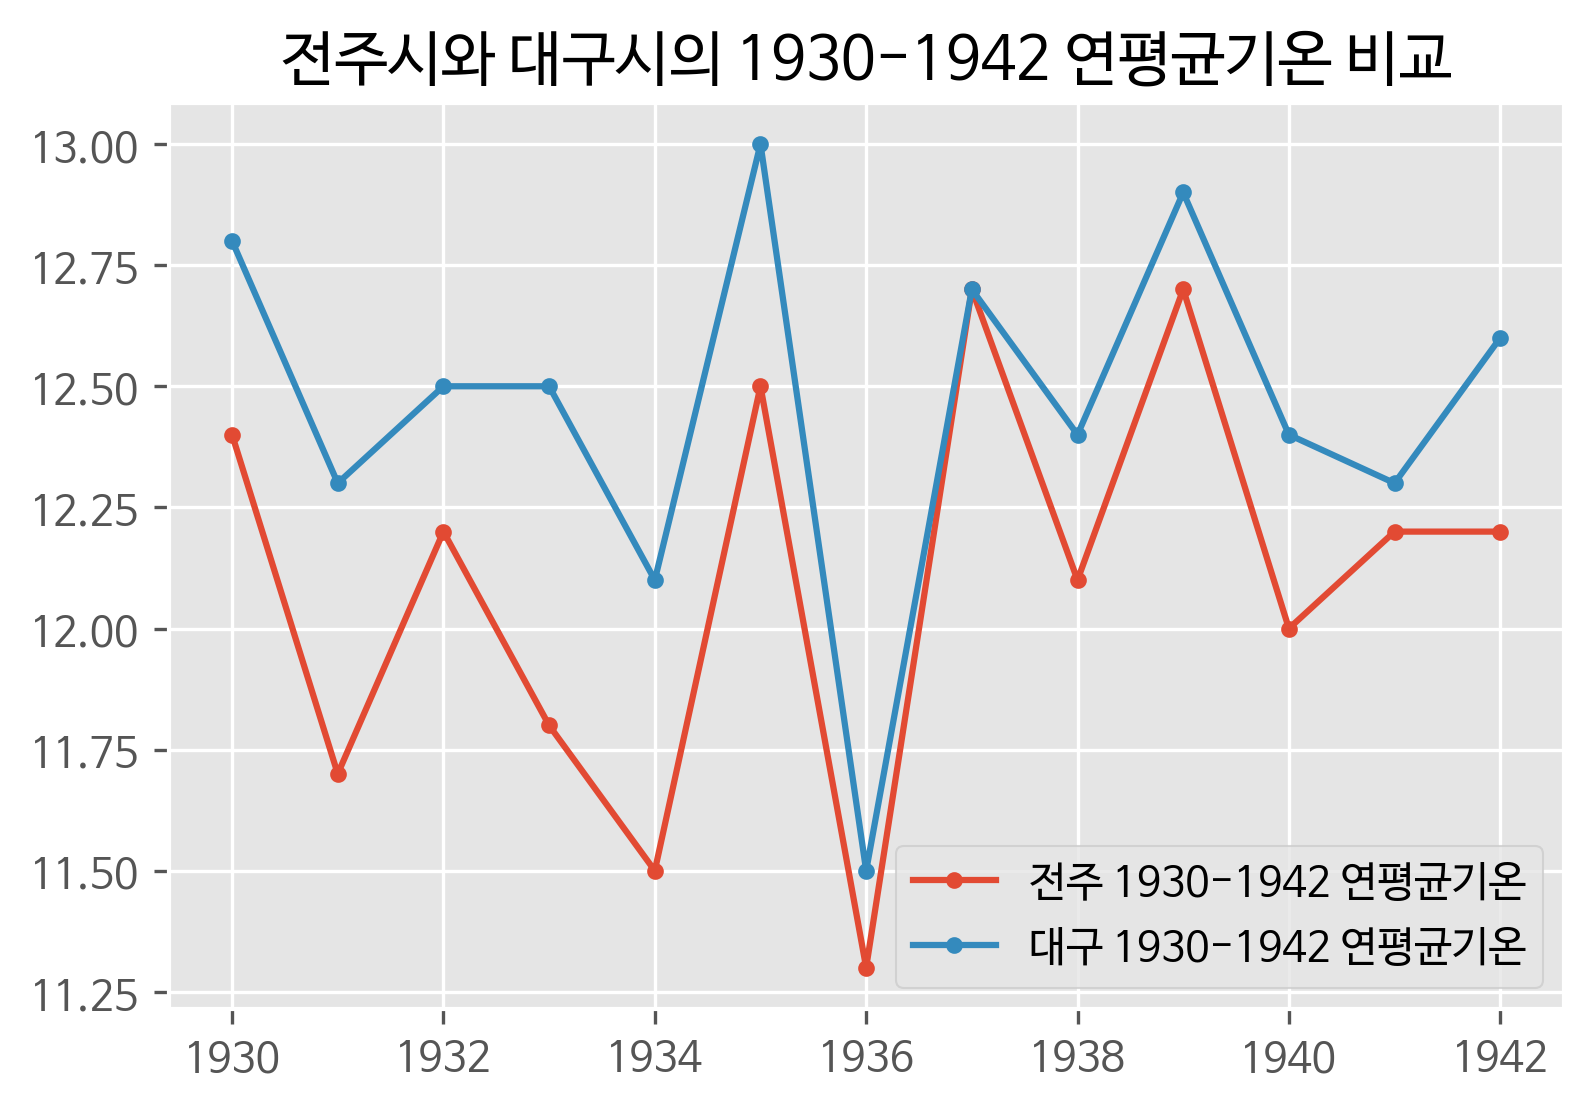

In [ ]:
# 1930-1942 데이터 시각화
# 차트 설정
plt.figure(dpi=150)
plt.style.use('ggplot') # 스타일 지정
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정 -> 한글 깨짐 처리
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 차트 그리기
plt.plot(year30_42,jj_30_42_temp, marker='.', label='전주 1930-1942 연평균기온')
plt.plot(year30_42,dg_30_42_temp, marker='.', label='대구 1930-1942 연평균기온')
plt.title('전주시와 대구시의 1930-1942 연평균기온 비교')
plt.legend() # 범례 표시
plt.show()

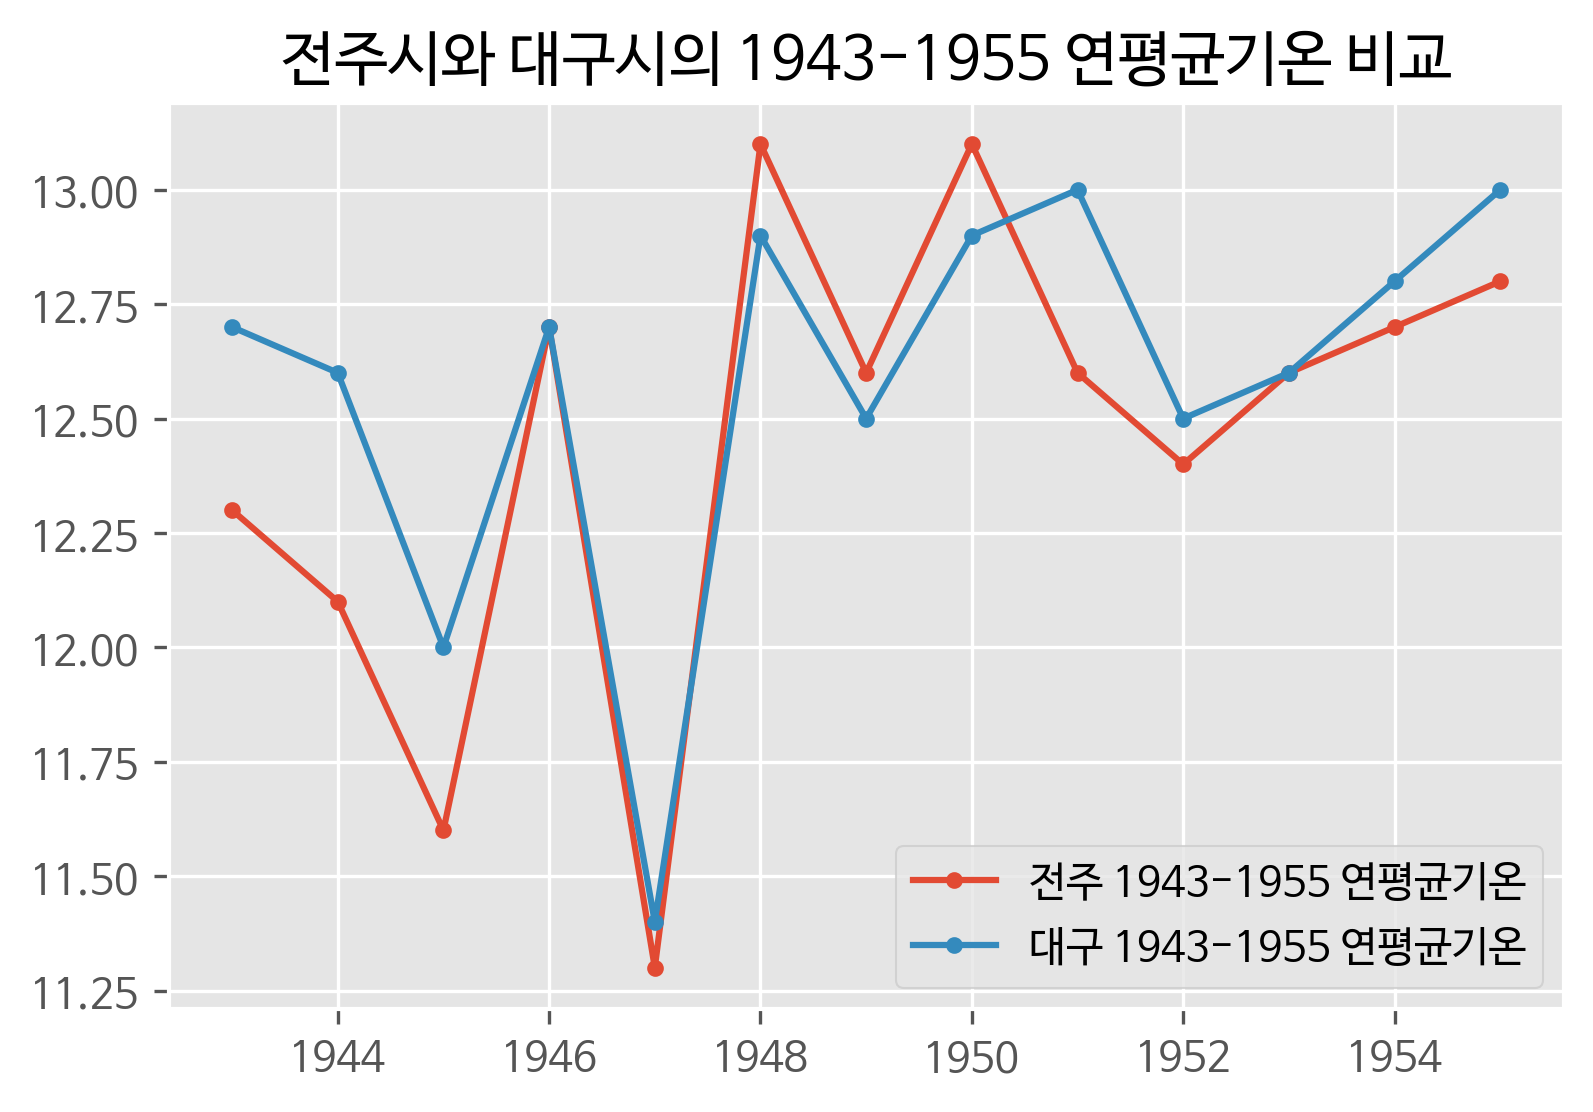

In [ ]:
# 1943-1955 데이터 시각화
# 차트 설정
plt.figure(dpi=150)
plt.style.use('ggplot') # 스타일 지정
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정 -> 한글 깨짐 처리
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 차트 그리기
plt.plot(year43_55,jj_43_55_temp, marker='.', label='전주 1943-1955 연평균기온')
plt.plot(year43_55,dg_43_55_temp, marker='.', label='대구 1943-1955 연평균기온')
plt.title('전주시와 대구시의 1943-1955 연평균기온 비교')
plt.legend() # 범례 표시
plt.show()

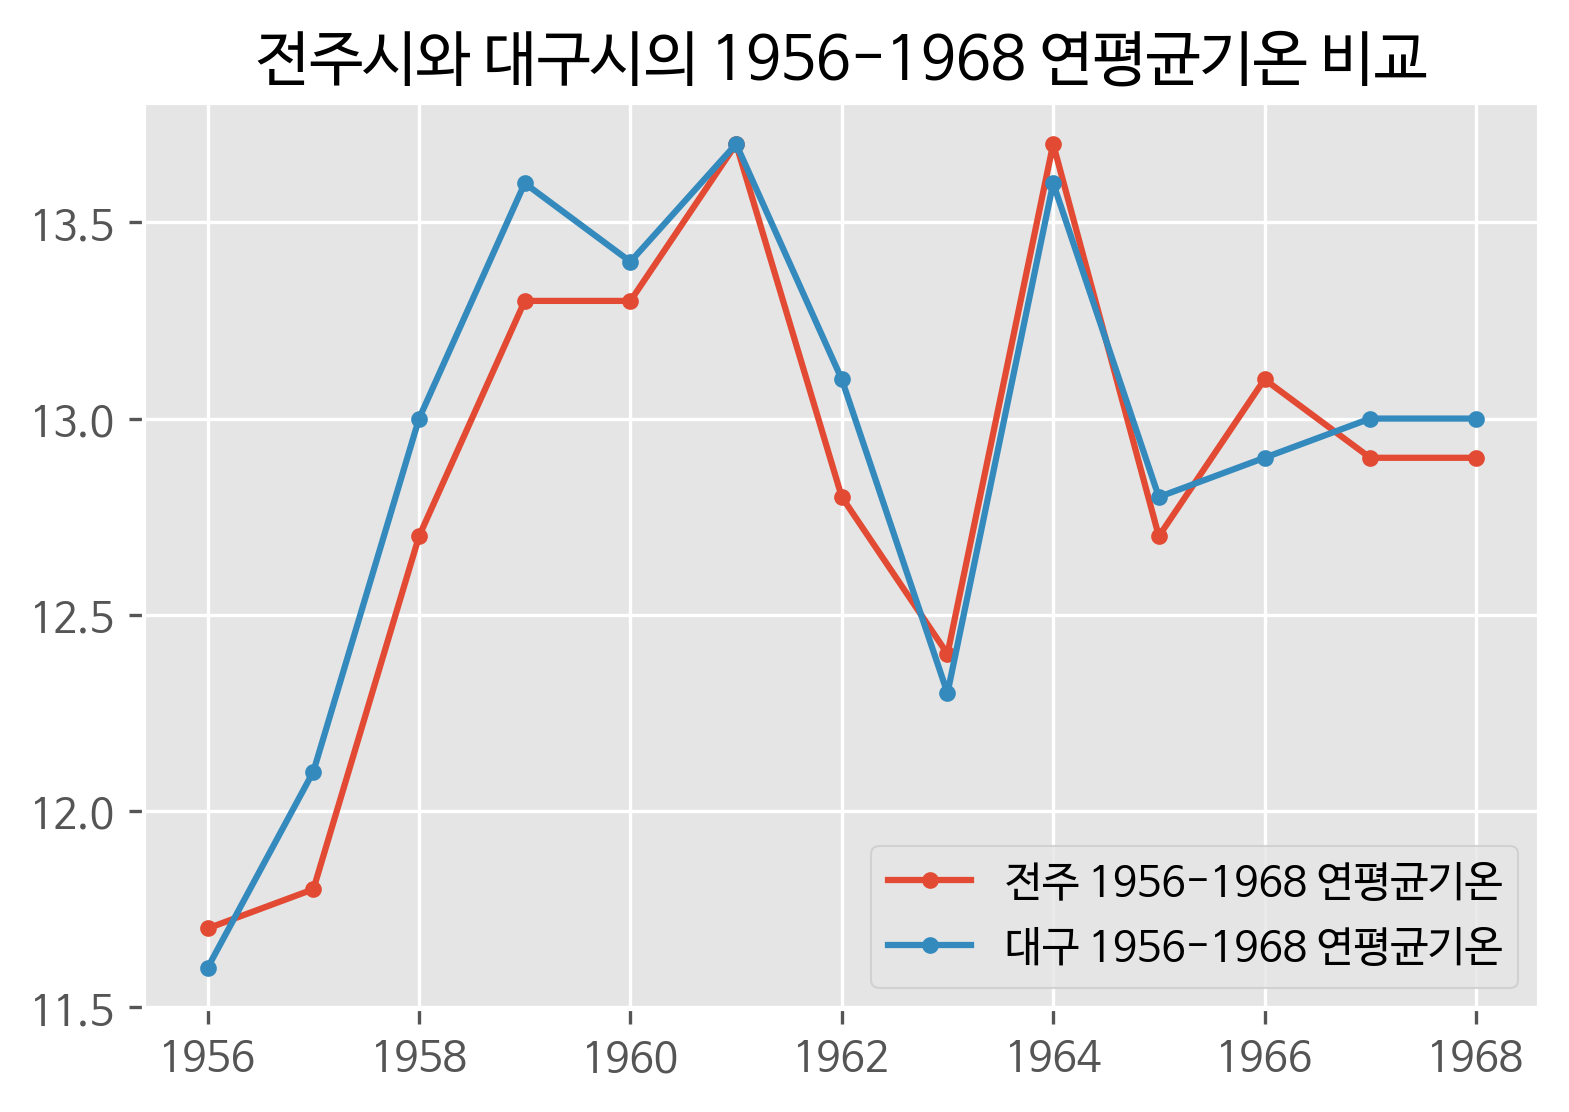

In [ ]:
# 1956-1968 데이터 시각화
# 차트 설정
plt.figure(dpi=150)
plt.style.use('ggplot') # 스타일 지정
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정 -> 한글 깨짐 처리
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 차트 그리기
plt.plot(year56_68,jj_56_68_temp, marker='.', label='전주 1956-1968 연평균기온')
plt.plot(year56_68,dg_56_68_temp, marker='.', label='대구 1956-1968 연평균기온')
plt.title('전주시와 대구시의 1956-1968 연평균기온 비교')
plt.legend() # 범례 표시
plt.show()

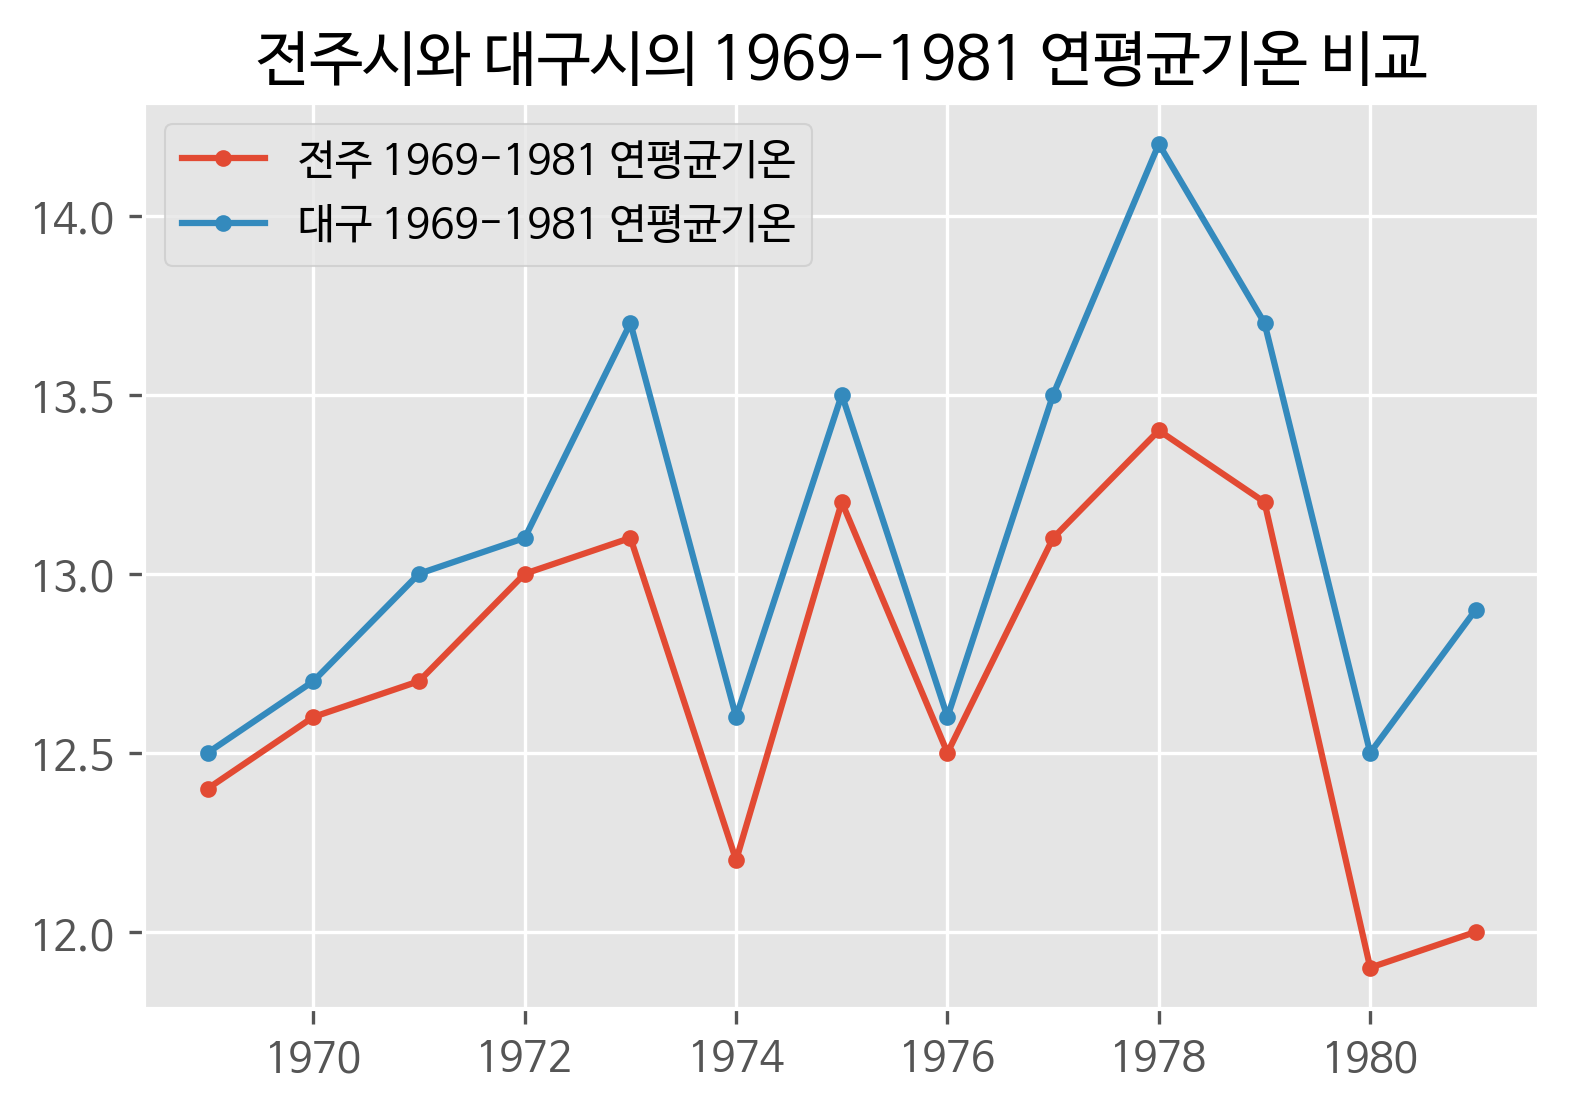

In [ ]:
# 1969-1981 데이터 시각화
# 차트 설정
plt.figure(dpi=150)
plt.style.use('ggplot') # 스타일 지정
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정 -> 한글 깨짐 처리
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 차트 그리기
plt.plot(year69_81,jj_69_81_temp, marker='.', label='전주 1969-1981 연평균기온')
plt.plot(year69_81,dg_69_81_temp, marker='.', label='대구 1969-1981 연평균기온')
plt.title('전주시와 대구시의 1969-1981 연평균기온 비교')
plt.legend() # 범례 표시
plt.show()

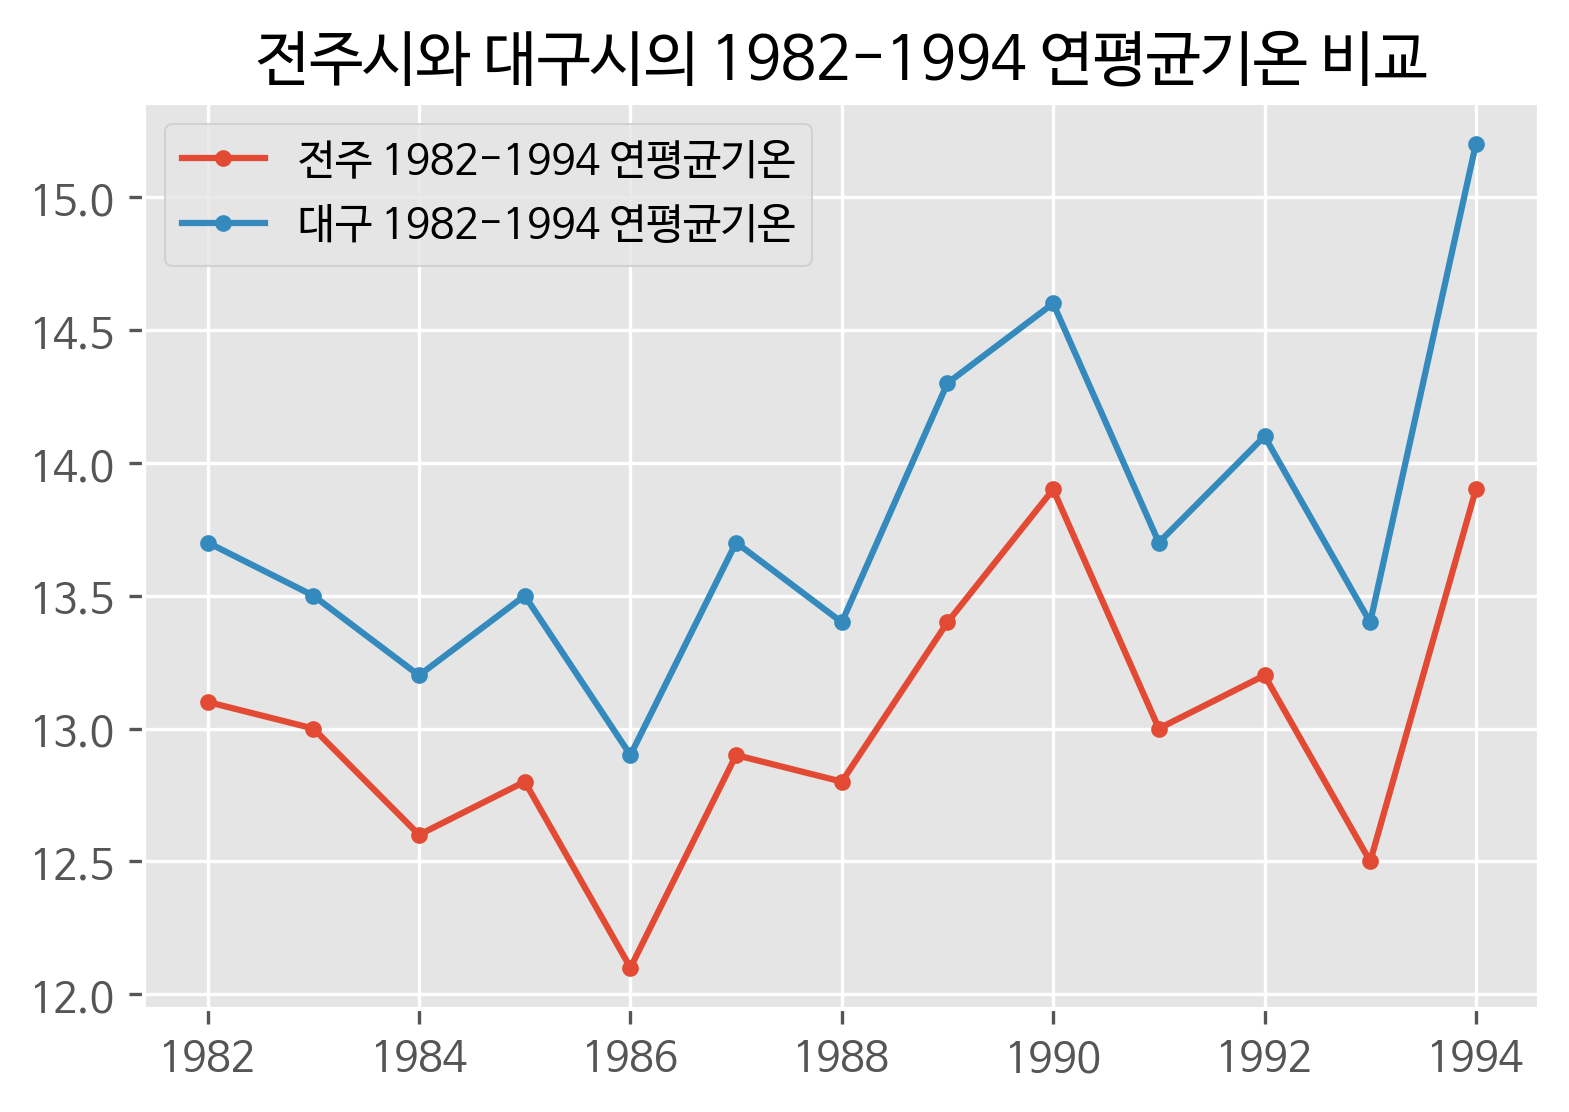

In [ ]:
# 1982-1994 데이터 시각화
# 차트 설정
plt.figure(dpi=150)
plt.style.use('ggplot') # 스타일 지정
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정 -> 한글 깨짐 처리
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 차트 그리기
plt.plot(year82_94,jj_82_94_temp, marker='.', label='전주 1982-1994 연평균기온')
plt.plot(year82_94,dg_82_94_temp, marker='.', label='대구 1982-1994 연평균기온')
plt.title('전주시와 대구시의 1982-1994 연평균기온 비교')
plt.legend() # 범례 표시
plt.show()

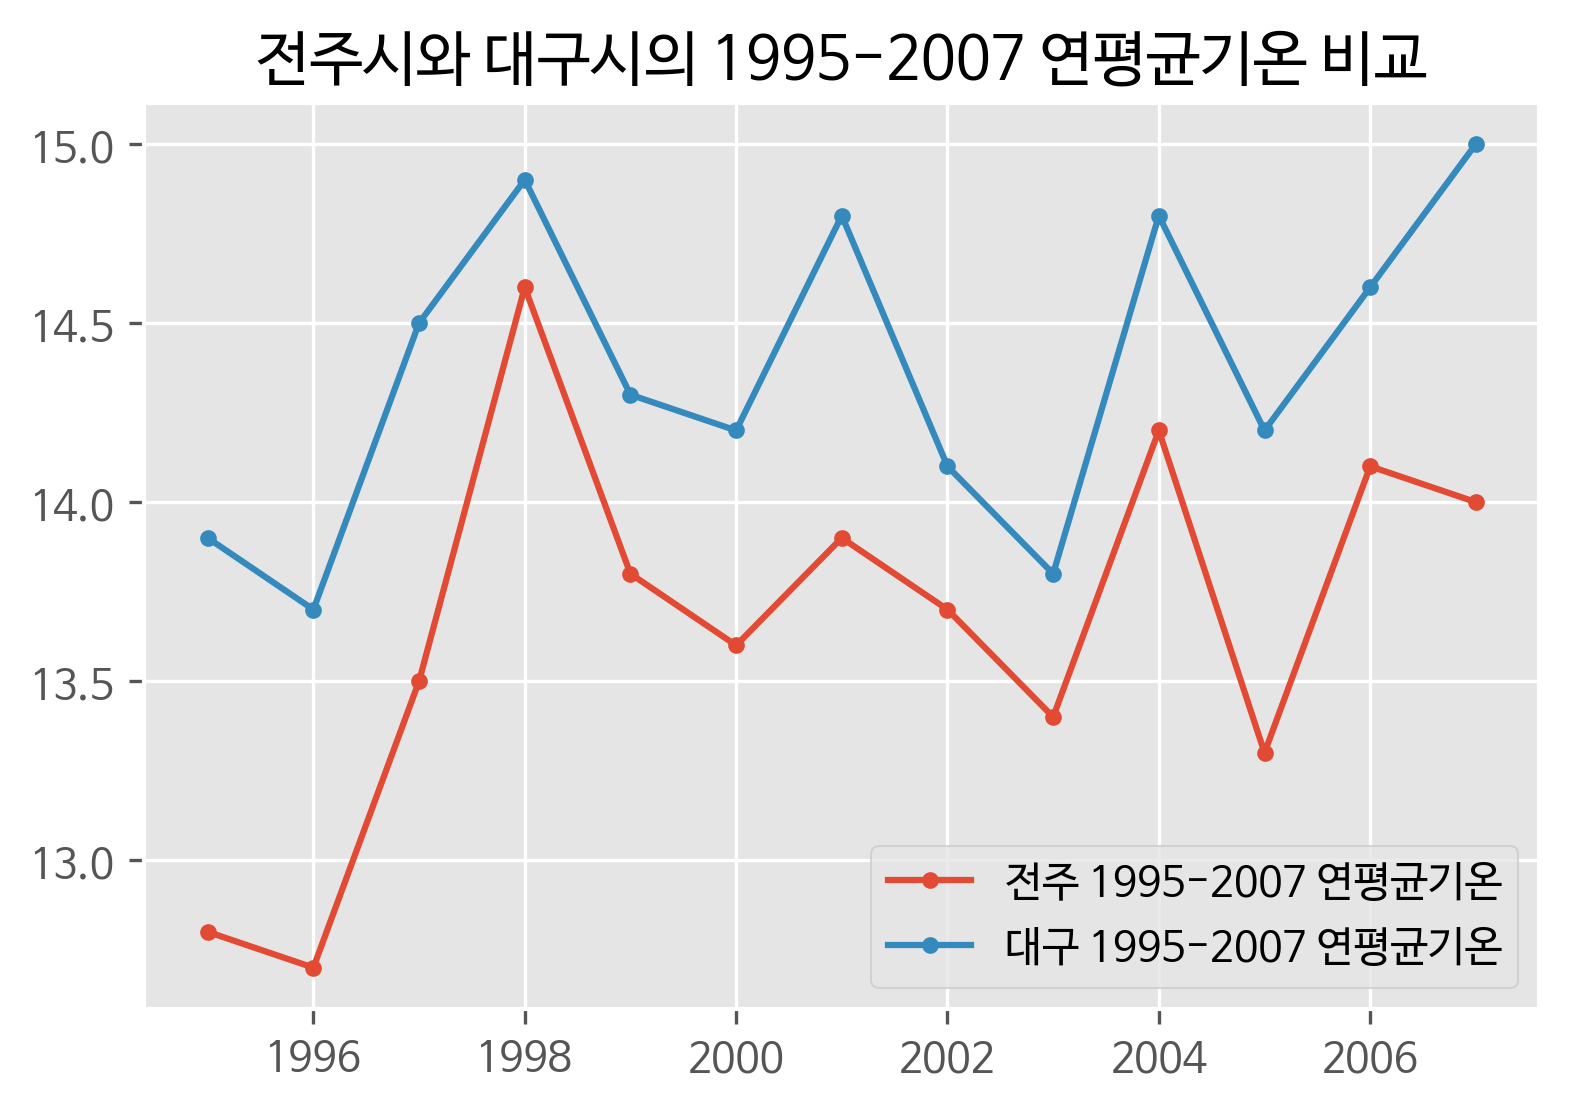

In [ ]:
# 1995-2007 데이터 시각화
# 차트 설정
plt.figure(dpi=150)
plt.style.use('ggplot') # 스타일 지정
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정 -> 한글 깨짐 처리
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 차트 그리기
plt.plot(year95_07,jj_95_07_temp, marker='.', label='전주 1995-2007 연평균기온')
plt.plot(year95_07,dg_95_07_temp, marker='.', label='대구 1995-2007 연평균기온')
plt.title('전주시와 대구시의 1995-2007 연평균기온 비교')
plt.legend() # 범례 표시
plt.show()

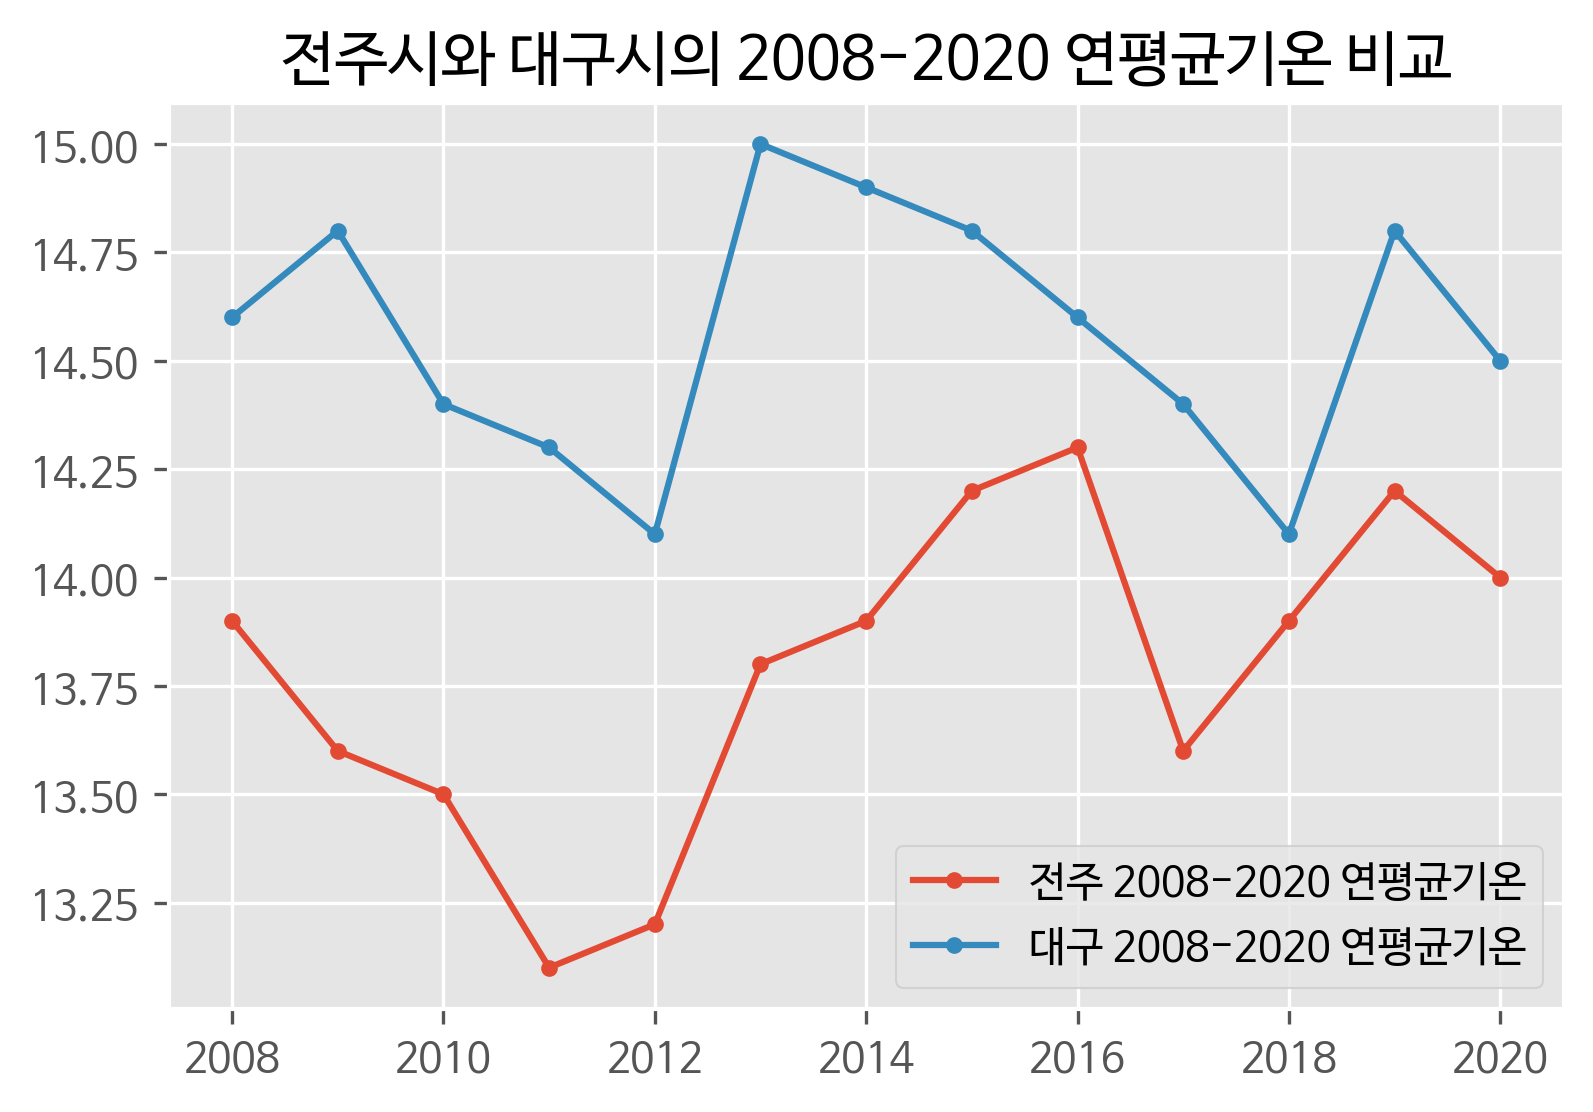

In [ ]:
# 2008-2020 데이터 시각화
# 차트 설정
plt.figure(dpi=150)
plt.style.use('ggplot') # 스타일 지정
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정 -> 한글 깨짐 처리
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 차트 그리기
plt.plot(year08_20, jj_08_20_temp, marker='.', label='전주 2008-2020 연평균기온')
plt.plot(year08_20, dg_08_20_temp, marker='.', label='대구 2008-2020 연평균기온')
plt.title('전주시와 대구시의 2008-2020 연평균기온 비교')
plt.legend() # 범례 표시
plt.show()

**부안군** 기온 데이터 불러오기

In [ ]:
df_buan = pd.read_csv('/content/buan_temperature_1982_2020.csv', encoding='cp949')

**부안군** 데이터 분류 및 시각화 준비

In [ ]:
# 날짜와 기온을 담을 리스트 준비하기
# 1. 1982년 ~ 1994년 리스트
# ba_82_94 = []
ba_82_94_temp = []

# 2. 1995년 ~ 2007년 리스트
# ba_95_07 = []
ba_95_07_temp = []

# 3. 2008년 ~ 2020년 리스트
# ba_08_20 = []
ba_08_20_temp = []

In [ ]:
# 부안군 기온 데이터 시각화를 위한 데이터 리스트에 담기
for i in df_buan.index :
  for j in range(13) :
    if year82_94[j] == df_buan.loc[i, '일시'] :
      # ba_82_94.append(df_buan.loc[i, '일시'])
      ba_82_94_temp.append(df_buan.loc[i, '평균기온(℃)'])
      
    elif year95_07[j] == df_buan.loc[i, '일시'] :
      # ba_95_07.append(df_buan.loc[i, '일시'])
      ba_95_07_temp.append(df_buan.loc[i, '평균기온(℃)'])

    elif year08_20[j] == df_buan.loc[i, '일시'] :
      # ba_08_20.append(df_buan.loc[i, '일시'])
      ba_08_20_temp.append(df_buan.loc[i, '평균기온(℃)'])

**전주시**와 **부안군**의 연평균기온 비교

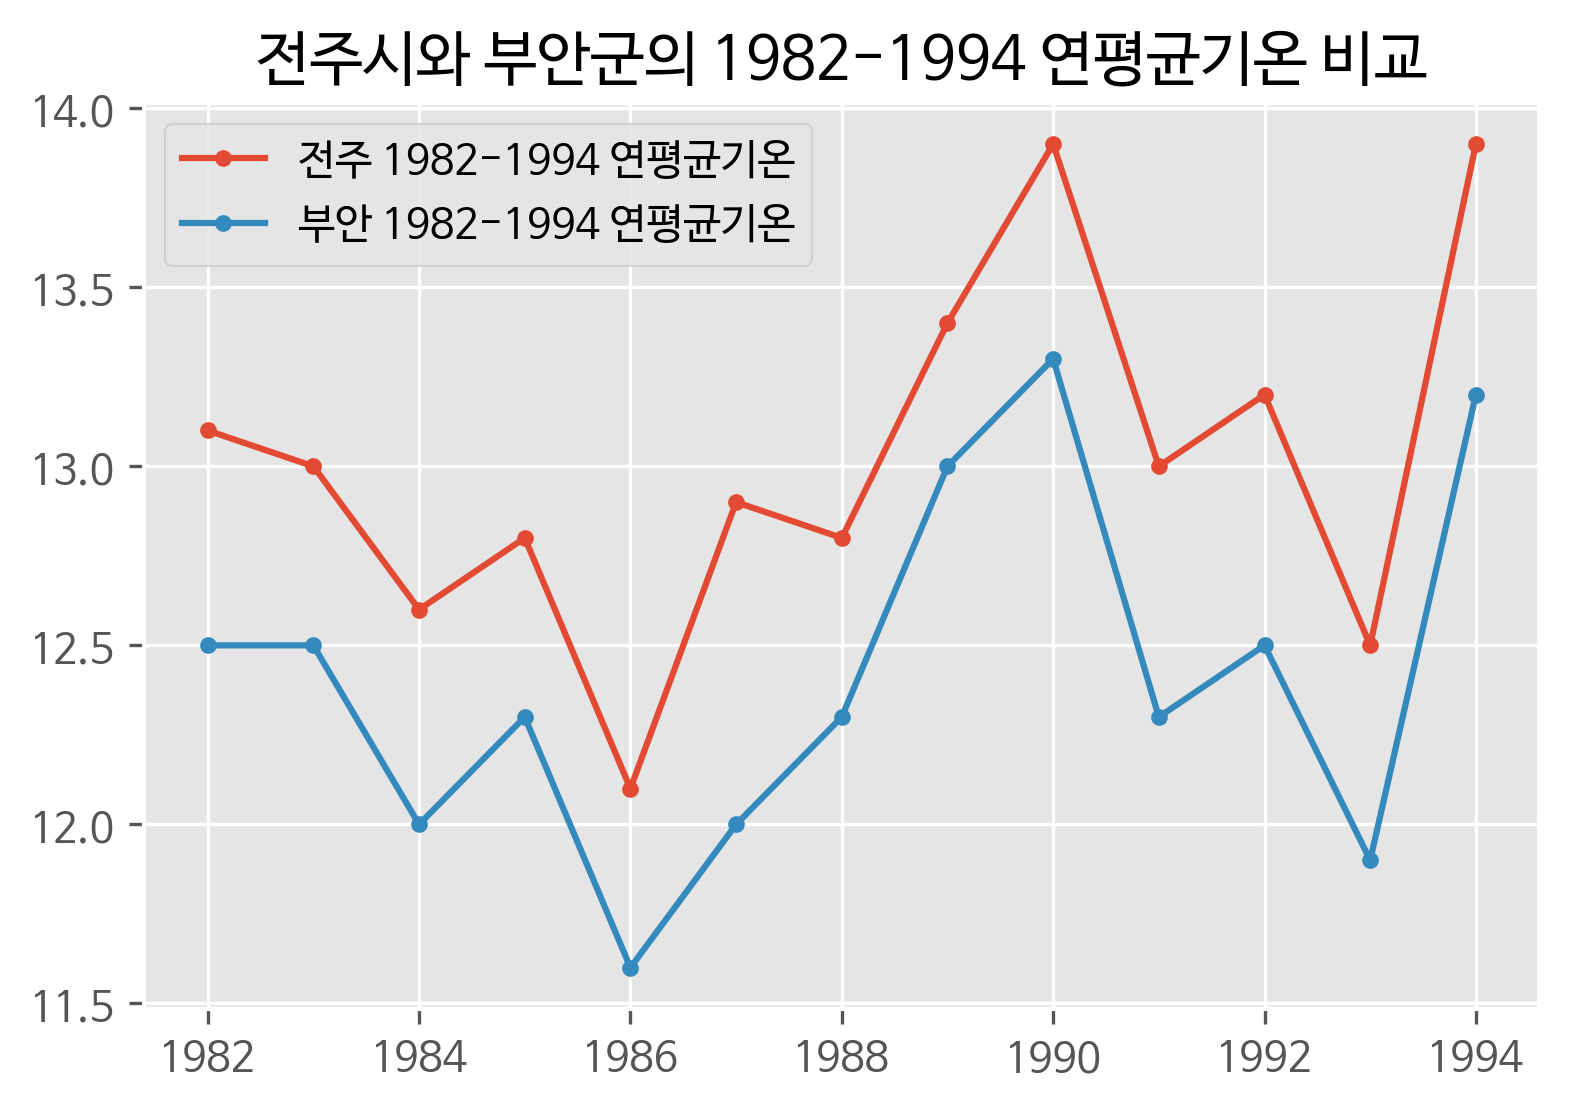

In [ ]:
# 1982-1994 데이터 시각화
# 차트 설정
plt.figure(dpi=150)
plt.style.use('ggplot') # 스타일 지정
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정 -> 한글 깨짐 처리
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 차트 그리기
plt.plot(year82_94,jj_82_94_temp, marker='.', label='전주 1982-1994 연평균기온')
plt.plot(year82_94,ba_82_94_temp, marker='.', label='부안 1982-1994 연평균기온')
plt.title('전주시와 부안군의 1982-1994 연평균기온 비교')
plt.legend() # 범례 표시
plt.show()

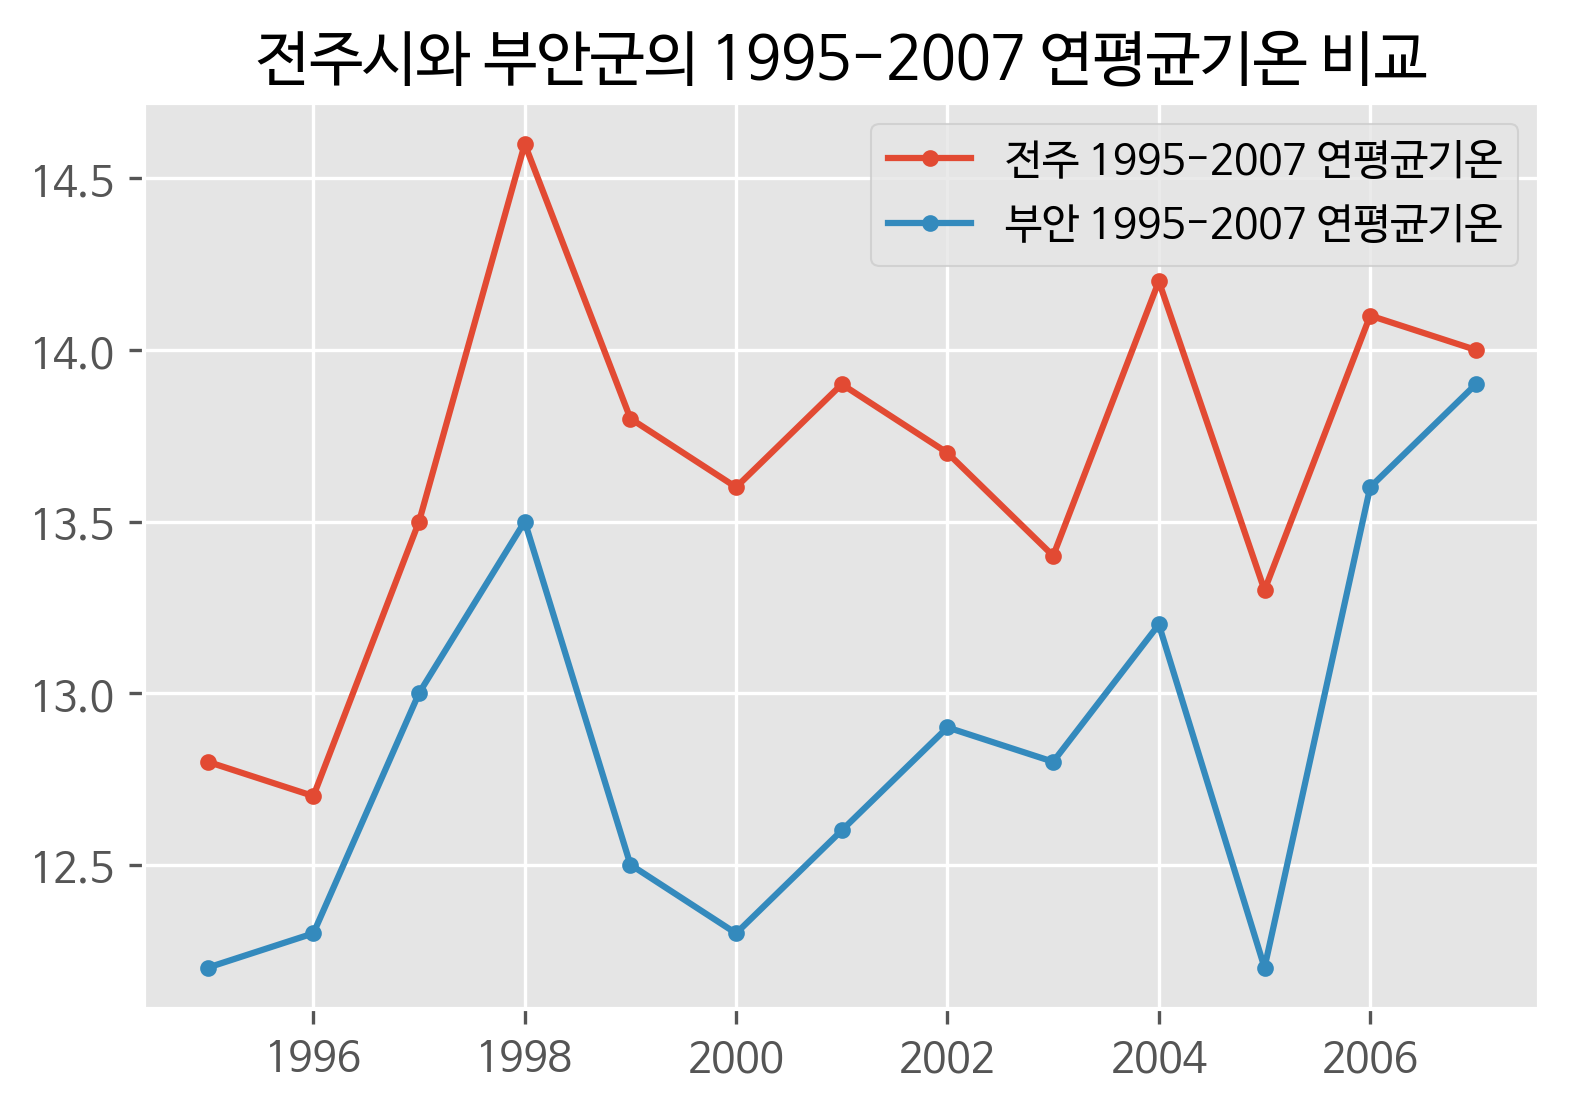

In [ ]:
# 1995-2007 데이터 시각화
# 차트 설정
plt.figure(dpi=150)
plt.style.use('ggplot') # 스타일 지정
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정 -> 한글 깨짐 처리
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 차트 그리기
plt.plot(year95_07,jj_95_07_temp, marker='.', label='전주 1995-2007 연평균기온')
plt.plot(year95_07,ba_95_07_temp, marker='.', label='부안 1995-2007 연평균기온')
plt.title('전주시와 부안군의 1995-2007 연평균기온 비교')
plt.legend() # 범례 표시
plt.show()

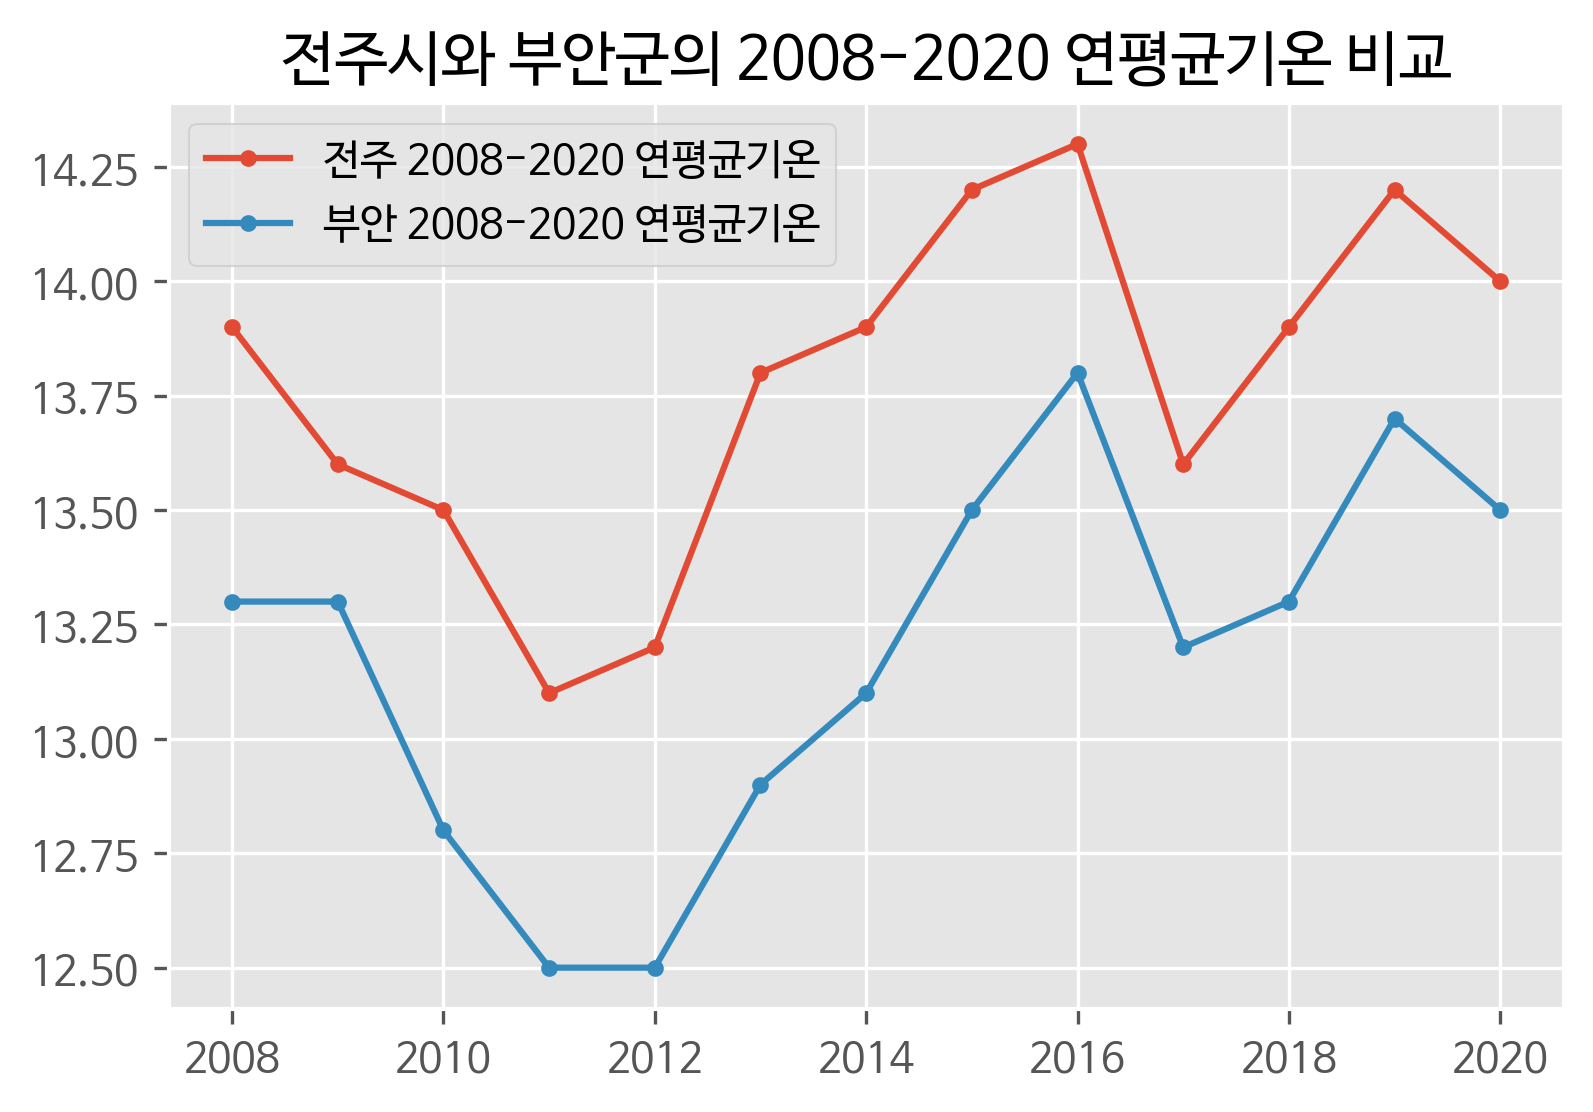

In [ ]:
# 2008-2020 데이터 시각화
# 차트 설정
plt.figure(dpi=150)
plt.style.use('ggplot') # 스타일 지정
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정 -> 한글 깨짐 처리
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 차트 그리기
plt.plot(year08_20,jj_08_20_temp, marker='.', label='전주 2008-2020 연평균기온')
plt.plot(year08_20,ba_08_20_temp, marker='.', label='부안 2008-2020 연평균기온')
plt.title('전주시와 부안군의 2008-2020 연평균기온 비교')
plt.legend() # 범례 표시
plt.show()

**군산시** 기온 데이터 불러오기

In [ ]:
df_gunsan = pd.read_csv('/content/gunsan_temperature_1969_2020.csv', encoding='cp949')

**군산시** 데이터 분류 및 시각화 준비

In [ ]:
# 날짜와 기온을 담을 리스트 준비하기
# 1. 1969년 ~ 1981년 리스트
# gs_69_81 = []
gs_69_81_temp = []

# 2. 1982년 ~ 1994년 리스트
# gs_82_94 = []
gs_82_94_temp = []

# 3. 1995년 ~ 2007년 리스트
# gs_95_07 = []
gs_95_07_temp = []

# 4. 2008년 ~ 2020년 리스트
# gs_08_20 = []
gs_08_20_temp = []

In [ ]:
# 군산시 기온 데이터 시각화를 위한 데이터 리스트에 담기
for i in df_gunsan.index :
  for j in range(13) :
    if year69_81[j] == df_gunsan.loc[i, '일시'] :
      # gs_69_81.append(df_gunsan.loc[i, '일시'])
      gs_69_81_temp.append(df_gunsan.loc[i, '평균기온(℃)'])

    elif year82_94[j] == df_gunsan.loc[i, '일시'] :
      # gs_82_94.append(df_gunsan.loc[i, '일시'])
      gs_82_94_temp.append(df_gunsan.loc[i, '평균기온(℃)'])
      
    elif year95_07[j] == df_gunsan.loc[i, '일시'] :
      # gs_95_07.append(df_gunsan.loc[i, '일시'])
      gs_95_07_temp.append(df_gunsan.loc[i, '평균기온(℃)'])

    elif year08_20[j] == df_gunsan.loc[i, '일시'] :
      # gs_08_20.append(df_gunsan.loc[i, '일시'])
      gs_08_20_temp.append(df_gunsan.loc[i, '평균기온(℃)'])

**전주시**와 **군산시**의 연평균기온 비교

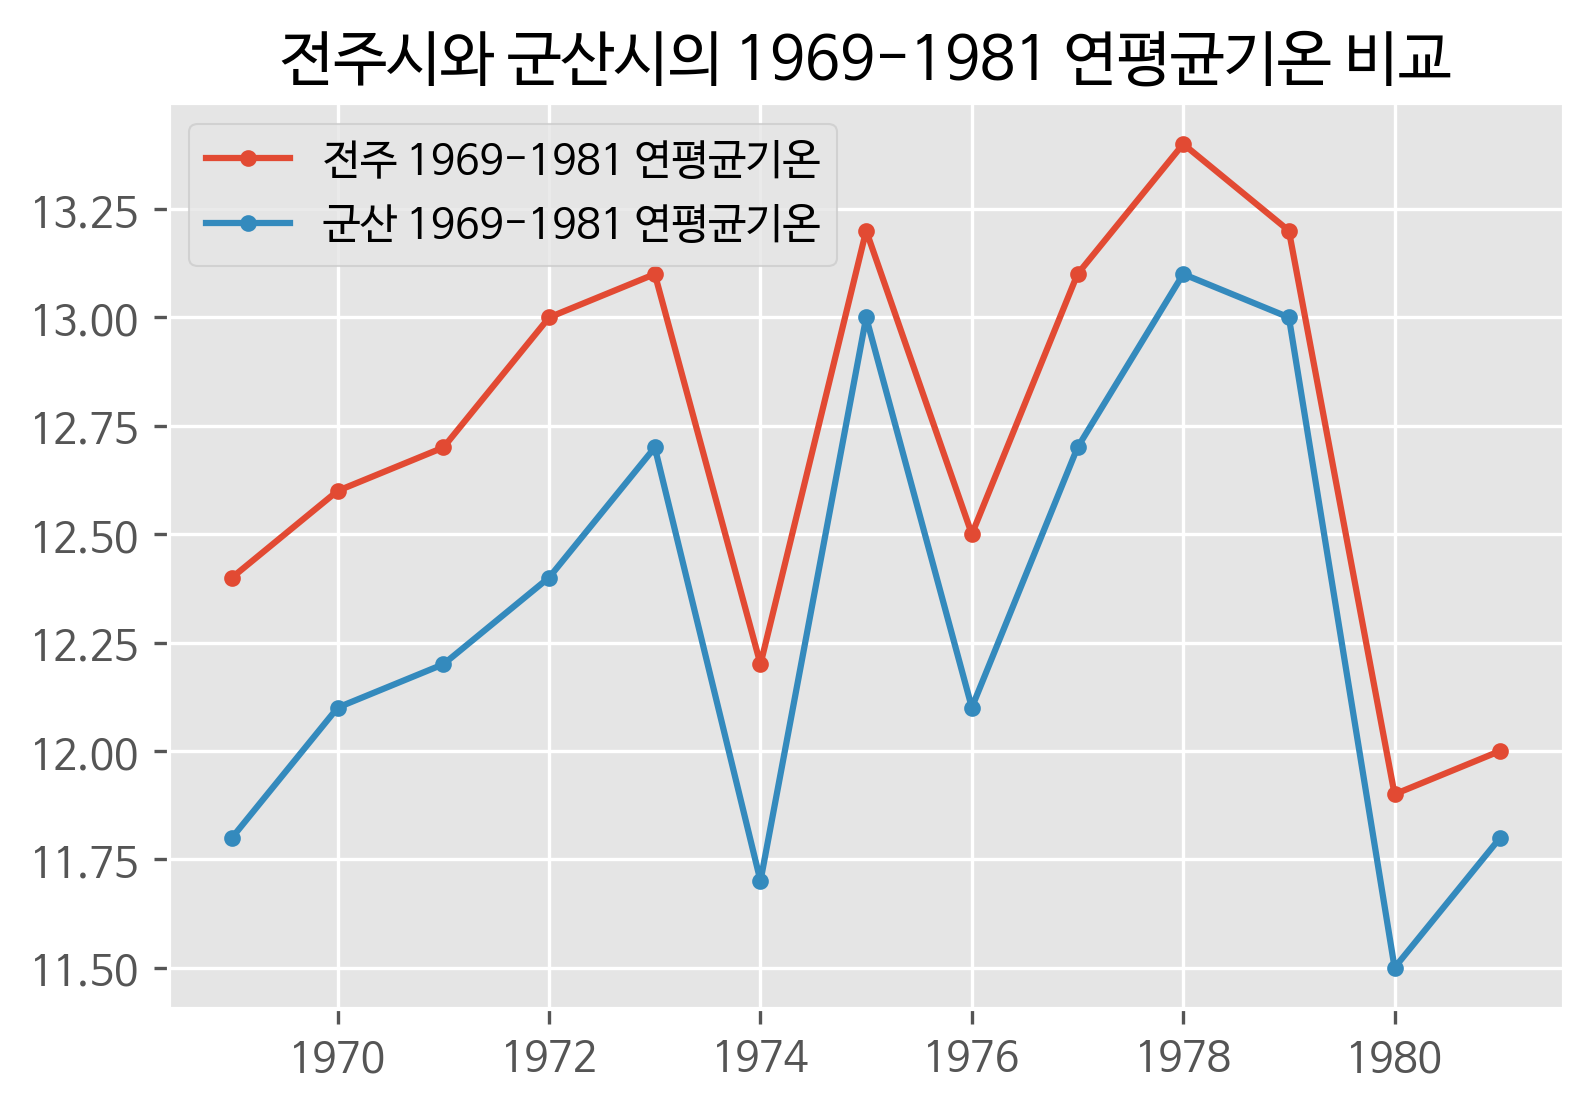

In [ ]:
# 1969-1981 데이터 시각화
# 차트 설정
plt.figure(dpi=150)
plt.style.use('ggplot') # 스타일 지정
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정 -> 한글 깨짐 처리
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 차트 그리기
plt.plot(year69_81,jj_69_81_temp, marker='.', label='전주 1969-1981 연평균기온')
plt.plot(year69_81,gs_69_81_temp, marker='.', label='군산 1969-1981 연평균기온')
plt.title('전주시와 군산시의 1969-1981 연평균기온 비교')
plt.legend() # 범례 표시
plt.show()

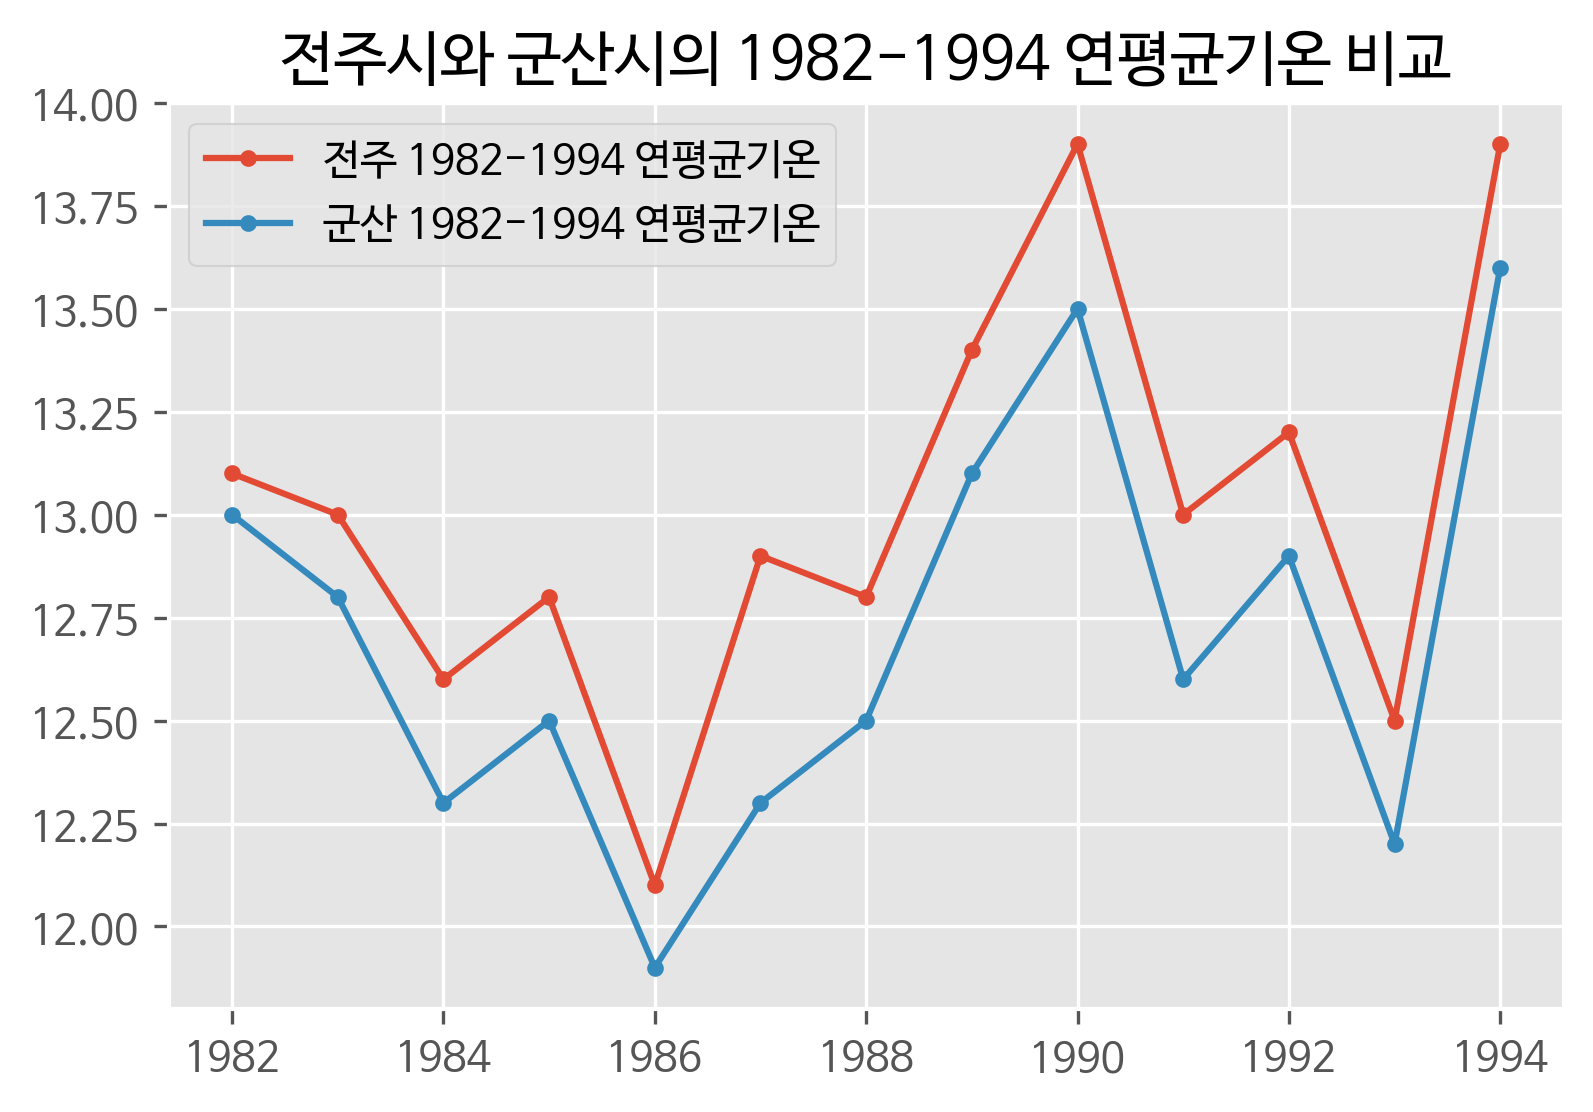

In [ ]:
# 1982-1994 데이터 시각화
# 차트 설정
plt.figure(dpi=150)
plt.style.use('ggplot') # 스타일 지정
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정 -> 한글 깨짐 처리
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 차트 그리기
plt.plot(year82_94,jj_82_94_temp, marker='.', label='전주 1982-1994 연평균기온')
plt.plot(year82_94,gs_82_94_temp, marker='.', label='군산 1982-1994 연평균기온')
plt.title('전주시와 군산시의 1982-1994 연평균기온 비교')
plt.legend() # 범례 표시
plt.show()

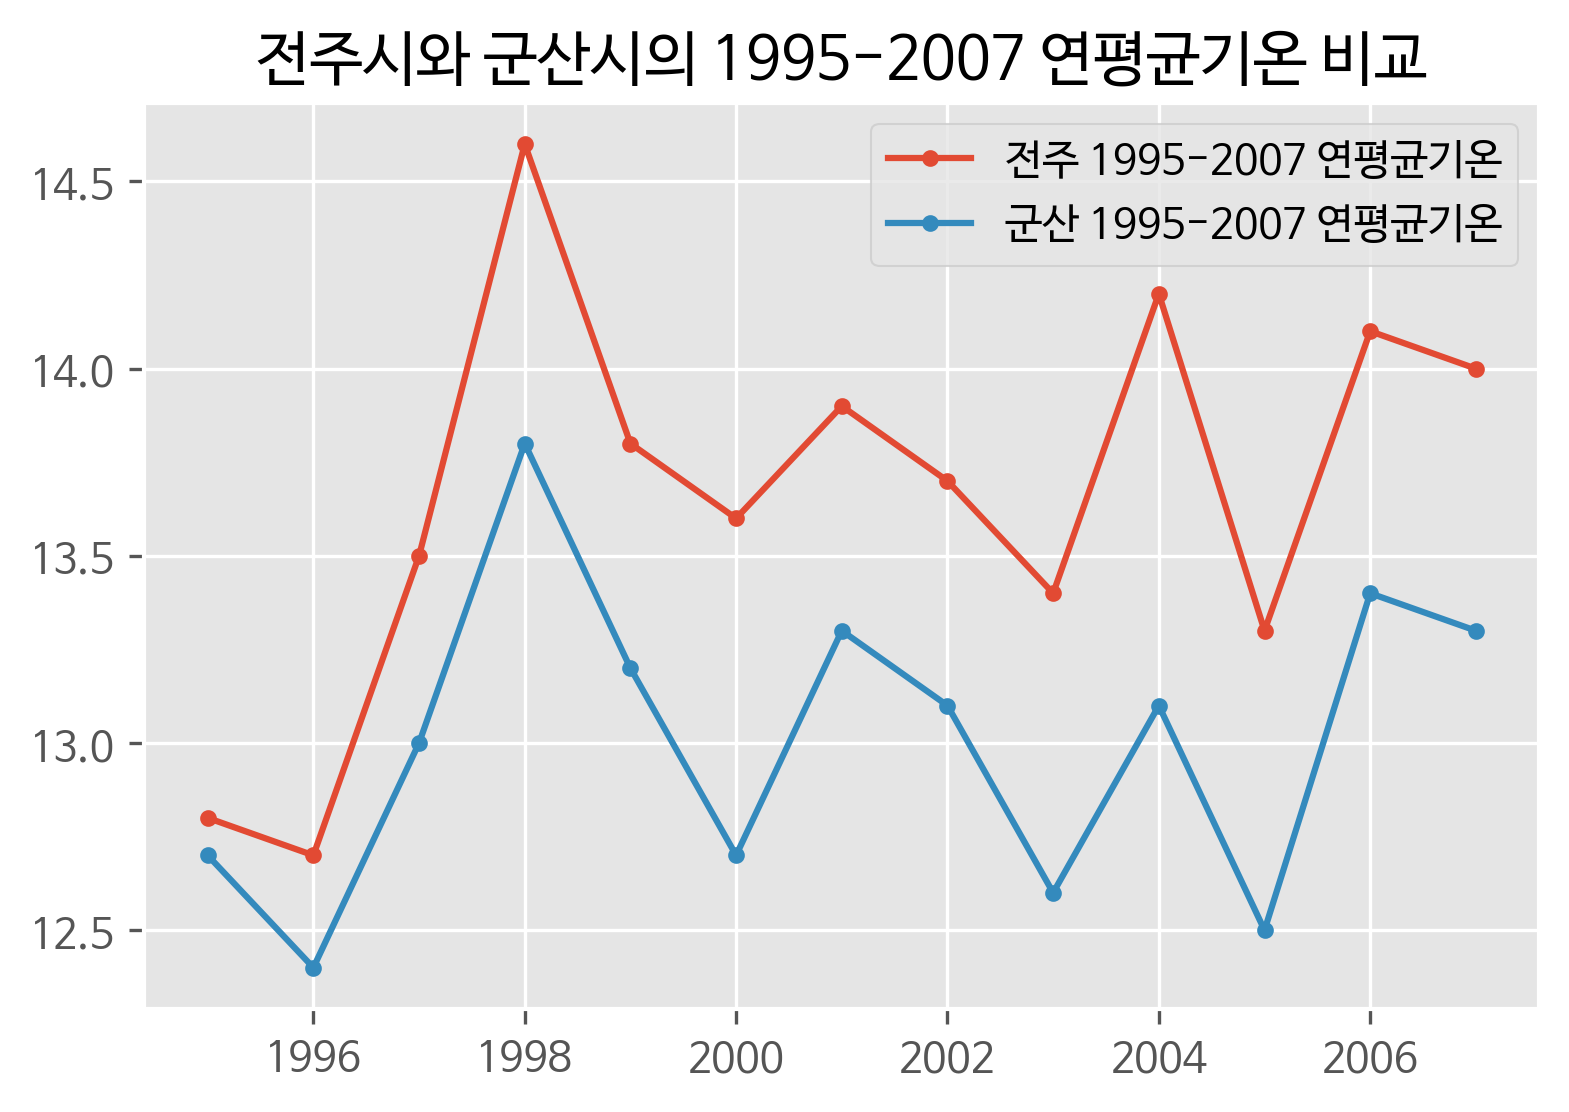

In [ ]:
# 1995-2007 데이터 시각화
# 차트 설정
plt.figure(dpi=150)
plt.style.use('ggplot') # 스타일 지정
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정 -> 한글 깨짐 처리
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 차트 그리기
plt.plot(year95_07,jj_95_07_temp, marker='.', label='전주 1995-2007 연평균기온')
plt.plot(year95_07,gs_95_07_temp, marker='.', label='군산 1995-2007 연평균기온')
plt.title('전주시와 군산시의 1995-2007 연평균기온 비교')
plt.legend() # 범례 표시
plt.show()

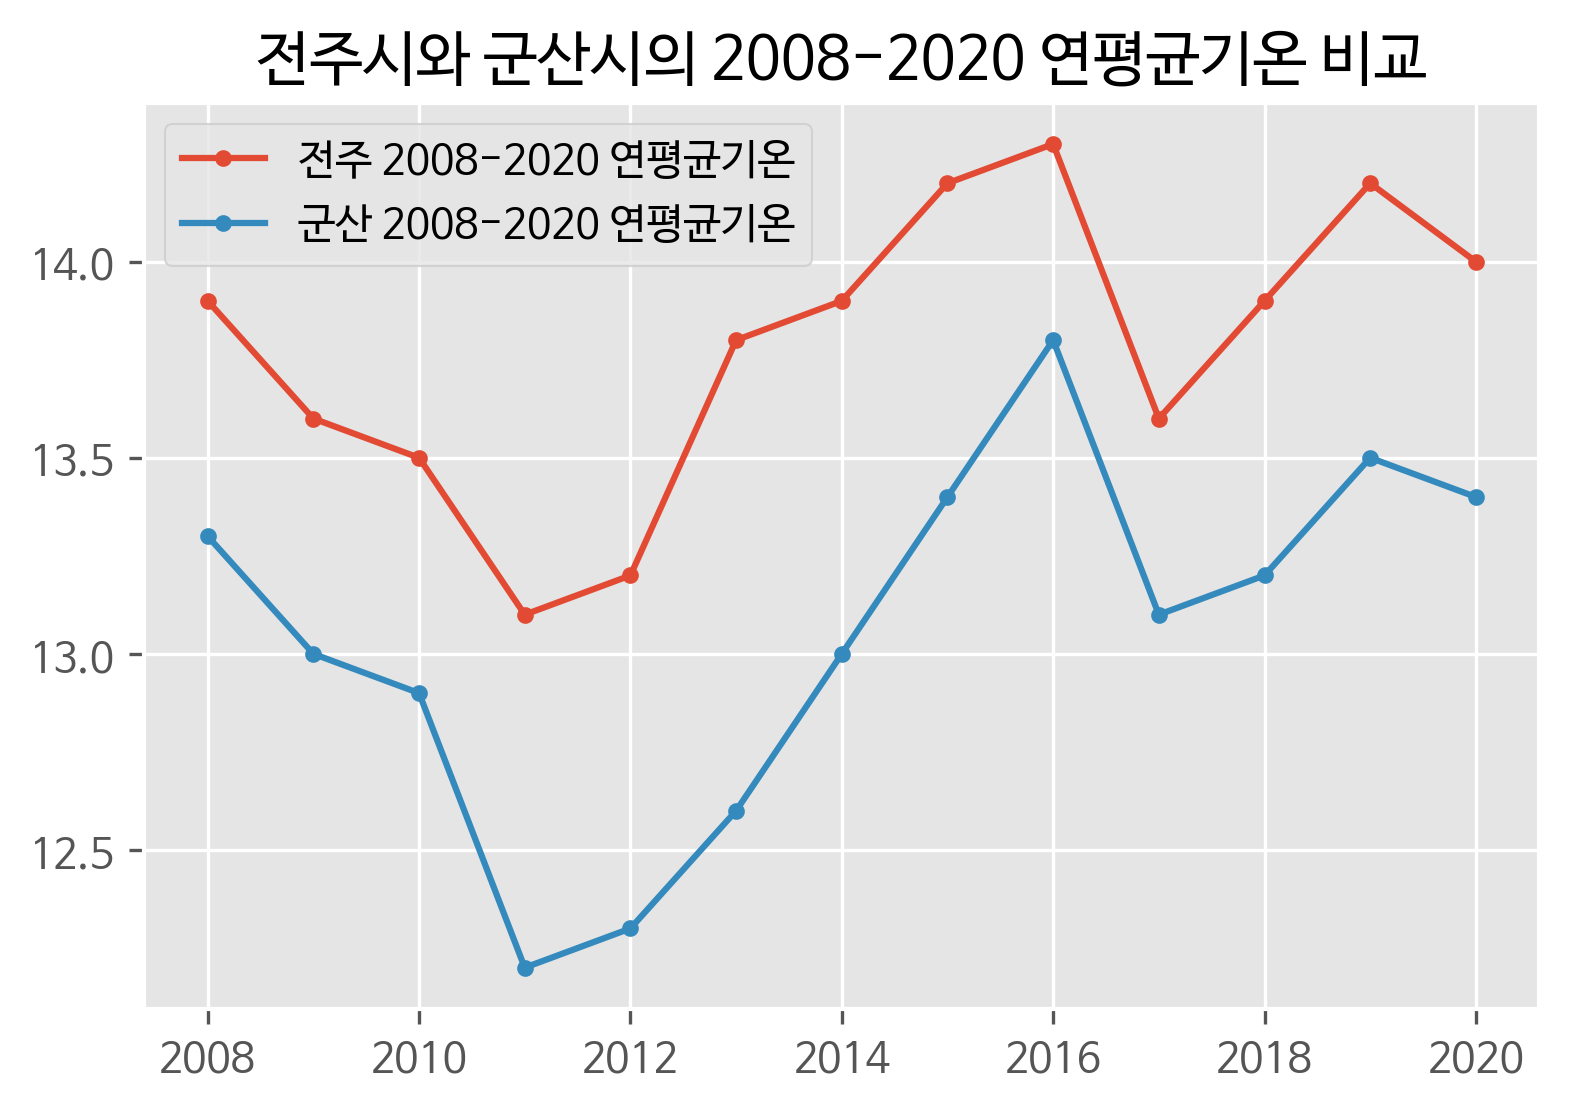

In [ ]:
# 2008-2020 데이터 시각화
# 차트 설정
plt.figure(dpi=150)
plt.style.use('ggplot') # 스타일 지정
plt.rc('font', family = 'NanumBarunGothic') # 나눔 바른 고딕을 기본 글꼴로 설정 -> 한글 깨짐 처리
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 차트 그리기
plt.plot(year08_20,jj_08_20_temp, marker='.', label='전주 2008-2020 연평균기온')
plt.plot(year08_20,gs_08_20_temp, marker='.', label='군산 2008-2020 연평균기온')
plt.title('전주시와 군산시의 2008-2020 연평균기온 비교')
plt.legend() # 범례 표시
plt.show()